In [1]:
from main import init_system
from api.apiutils import Relation
api, reporting = init_system("/Users/ra-mit/development/discovery_proto/test/dwh/")

Loading: */Users/ra-mit/development/discovery_proto/test/dwh/*

### Help Menu

You can use the system through an **API** object. API objects are returnedby the *init_system* function, so you can get one by doing:

***your_api_object = init_system('path_to_stored_model')***

Once you have access to an API object there are a few concepts that are useful to use the API. **content** refers to actual values of a given field. For example, if you have a table with an attribute called __Name__ and values *Olu, Mike, Sam*, content refers to the actual values, e.g. Mike, Sam, Olu.

**schema** refers to the name of a given field. In the previous example, schema refers to the word__Name__ as that's how the field is called.

Finally, **entity** refers to the *semantic type* of the content. This is in experimental state. For the previous example it would return *'person'* as that's what those names refer to.

Certain functions require a *field* as input. In general a field is specified by the source name (e.g. table name) and the field name (e.g. attribute name). For example, if we are interested in finding content similar to the one of the attribute *year* in the table *Employee* we can provide the field in the following way:

field = ('Employee', 'year') # field = [<source_name>, <field_name>)
Took 0.5452530384063721 to load all data


In [2]:
%matplotlib inline

## Discovery Functions

### Similar Tables

In [3]:
table = "Fac_building.csv"  # The table of interest
table_drs = api.drs_from_table(table)  # We get the representation of that table in DRS
similar_tables = api.similar_content_to(table_drs)  # similar tables are those with similar content

In [4]:
similar_tables.set_table_mode()  # We are interested in seeing tables, so we set the appropriate mode in DRS
for x in similar_tables:
    print(x)

Fclt_building_hist_1.csv
Fclt_building_list.csv
Fclt_rooms.csv
Zpm_rooms_load.csv
Sdo_coord_system.csv
Fclt_floor_hist.csv
Fac_building.csv
short_fclt_rooms_hist.csv
Fclt_floor.csv
Fclt_rooms_hist.csv
Fac_rooms.csv
Fac_floor.csv
Fclt_building.csv


Although for convenience, DRS objects has methods "print_tables()" and "print_columns()" that we use from now on

In [5]:
similar_tables.print_tables()

Fclt_building_hist_1.csv
Fclt_building_list.csv
Fclt_rooms.csv
Zpm_rooms_load.csv
Sdo_coord_system.csv
Fclt_floor_hist.csv
Fac_building.csv
short_fclt_rooms_hist.csv
Fclt_floor.csv
Fclt_rooms_hist.csv
Fac_rooms.csv
Fac_floor.csv
Fclt_building.csv


In [6]:
similar_tables.pretty_print_columns()

SOURCE: Fac_building.csv			 FIELD: Cost Center Code
SOURCE: Fclt_building.csv			 FIELD: Access Level Name
SOURCE: Fclt_rooms.csv			 FIELD: Access Level
SOURCE: Fclt_building_hist_1.csv			 FIELD: Ownership Type
SOURCE: Fclt_building_hist_1.csv			 FIELD: Access Level Name
SOURCE: Fclt_building_list.csv			 FIELD: Building Type
SOURCE: Fclt_building_hist_1.csv			 FIELD: Building Type
SOURCE: Fclt_floor_hist.csv			 FIELD: Access Level
SOURCE: Zpm_rooms_load.csv			 FIELD: Access Level
SOURCE: Fclt_building.csv			 FIELD: Date Built
SOURCE: Fac_building.csv			 FIELD: Cost Collector Key
SOURCE: Fclt_building.csv			 FIELD: Northing Y Spcs
SOURCE: Fclt_building.csv			 FIELD: Parent Building Number
SOURCE: Fclt_building_hist_1.csv			 FIELD: Access Level Code
SOURCE: Fclt_building.csv			 FIELD: Access Level Code
SOURCE: Fclt_building.csv			 FIELD: Num Of Rooms
SOURCE: Fclt_building_hist_1.csv			 FIELD: Latitude Wgs
SOURCE: Fac_floor.csv			 FIELD: Access Level
SOURCE: Fclt_building.csv			 FIELD: Cos

**We want to tune our definition of "similar table", we want both content and schema names to be similar**

In [7]:
table = "Fac_building.csv"  # The table of interest
table_drs = api.drs_from_table(table)  # We get the representation of that table in DRS
content_similar = api.similar_content_to(table_drs)  # similar tables are those with similar content
schema_similar = api.similar_schema_name_to(table_drs)
similar_tables = api.intersection(content_similar, schema_similar)

In [8]:
similar_tables.print_tables()

Fclt_building_hist_1.csv
Fclt_building_list.csv
Fclt_building.csv


**A table is similar to one of reference when content, schema are similar and there's also some PKFK relationship involved**

In [9]:
table = "Fac_building.csv"  # The table of interest
table_drs = api.drs_from_table(table)  # We get the representation of that table in DRS
content_similar = api.similar_content_to(table_drs)  # similar tables are those with similar content
schema_similar = api.similar_schema_name_to(table_drs)  # similar attribute names
pkfk_similar = api.pkfk_of(table_drs) # some pkfk relationship involved too
inters1 = api.intersection(content_similar, schema_similar) # similar tables are similar in content and schema
similar_tables = api.intersection(inters1, pkfk_similar)

In [10]:
similar_tables.print_tables()

Fclt_building_hist_1.csv
Fclt_building_list.csv
Fclt_building.csv


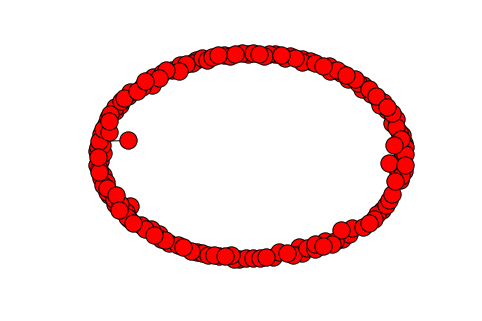

In [11]:
similar_tables.visualize_provenance()

**Trying it out with different tables: "Fctlt_building_hist_1.csv"**

In [12]:
table = "Fclt_building_hist_1.csv"  # The table of interest
table_drs = api.drs_from_table(table)  # We get the representation of that table in DRS
content_similar = api.similar_content_to(table_drs)  # similar tables are those with similar content
schema_similar = api.similar_schema_name_to(table_drs)  # similar attribute names
pkfk_similar = api.pkfk_of(table_drs) # some pkfk relationship involved too
inters1 = api.intersection(content_similar, schema_similar) # similar tables are similar in content and schema
similar_tables = api.intersection(inters1, pkfk_similar)

In [13]:
similar_tables.print_tables()

Fclt_building_list.csv
Fclt_building.csv
Fac_building.csv


**Trying it out with different tables: "Iap_subject_detail.csv"**

In [14]:
table = "Iap_subject_detail.csv"  # The table of interest
table_drs = api.drs_from_table(table)  # We get the representation of that table in DRS
similar_tables = api.similar_content_to(table_drs)  # similar tables are those with similar content

In [15]:
similar_tables.print_tables()

Iap_subject_detail.csv
Subject_iap_schedule.csv


In [16]:
table = "Iap_subject_detail.csv"  # The table of interest
table_drs = api.drs_from_table(table)  # We get the representation of that table in DRS
content_similar = api.similar_content_to(table_drs)  # similar tables are those with similar content
schema_similar = api.similar_schema_name_to(table_drs)  # similar attribute names
similar_tables = api.intersection(content_similar, schema_similar)

In [17]:
similar_tables.print_tables()

Subject_iap_schedule.csv


### Schema Complement

Given some table of reference, I want to know with which attributes I can extend it

In [18]:
table = "short_cis_course_catalog.csv"  # The table of interest
table_drs = api.drs_from_table(table)  # We get the representation of that table in DRS
joinable_tables = api.pkfk_of(table_drs)
all_attributes = api.drs_expand_to_table(joinable_tables)
attrs_to_extend = api.difference(all_attributes, table_drs)

In [19]:
attrs_to_extend.print_columns()

Hit(nid='98156762', db_name='dwhsmall', source_name='All_version_hview_wdepth.csv', field_name='Version', score=0)
Hit(nid='3090330384', db_name='dwhsmall', source_name='All_rlmgr_rulec_class_opcodes.csv', field_name='Op Code', score=0)
Hit(nid='3783670544', db_name='dwhsmall', source_name='All_rlmgr_rulec_class_opcodes.csv', field_name='Next Operation', score=0)
Hit(nid='4232558648', db_name='dwhsmall', source_name='All_rlmgr_rulec_class_opcodes.csv', field_name='Completed Op', score=0)
Hit(nid='93495604', db_name='dwhsmall', source_name='All_version_hview_wdepth.csv', field_name='Depth', score=0)
Hit(nid='1403485528', db_name='dwhsmall', source_name='All_version_hview_wdepth.csv', field_name='Parent Version', score=0)
Hit(nid='2452247066', db_name='dwhsmall', source_name='All_version_hview_wdepth.csv', field_name='Workspace', score=0)


### Join Path

Given two tables of reference I want to know if I can join them directly or through some other tables

In [20]:
table1_name = "Drupal_employee_directory.csv"
table2_name = "Employee_directory.csv"
table1 = api.drs_from_table(table1_name)
table2 = api.drs_from_table(table2_name)
paths = api.paths_between(table1, table2, Relation.PKFK)

In [21]:
res = paths.paths()
for r in res:
    print(str(r))

[Hit(nid='529677687', db_name='dwhsmall', source_name='Drupal_employee_directory.csv', field_name='Email Address', score=0), Hit(nid='3756011013', db_name='dwhsmall', source_name='Warehouse_users.csv', field_name='Email Address', score=0.999922036408997)]
[Hit(nid='529677687', db_name='dwhsmall', source_name='Drupal_employee_directory.csv', field_name='Email Address', score=0), Hit(nid='1724837508', db_name='dwhsmall', source_name='Employee_directory.csv', field_name='Email Address Uppercase', score=0.9483255988962749)]
[Hit(nid='2097968144', db_name='dwhsmall', source_name='Drupal_employee_directory.csv', field_name='Office Phone', score=0), Hit(nid='2899666346', db_name='dwhsmall', source_name='Employee_directory.csv', field_name='Office Phone', score=0.8169815153361771)]
[Hit(nid='529677687', db_name='dwhsmall', source_name='Drupal_employee_directory.csv', field_name='Email Address', score=0), Hit(nid='888651508', db_name='dwhsmall', source_name='Employee_directory.csv', field_name=

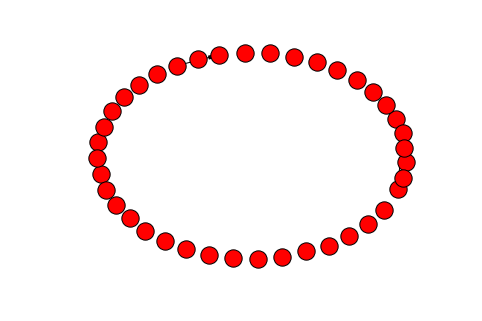

In [22]:
paths.visualize_provenance()

In [23]:
table1_name = "Drupal_employee_directory.csv"
table2_name = "Employee_directory.csv"
table1 = api.drs_from_table(table1_name)
table2 = api.drs_from_table(table2_name)
paths = api.paths_between(table1, table2, Relation.CONTENT_SIM)

In [24]:
paths.print_tables()

Warehouse_users.csv
Employee_directory.csv


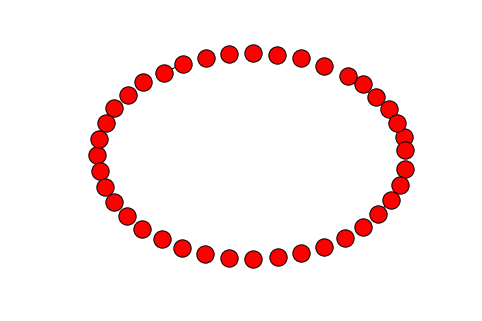

In [25]:
paths.visualize_provenance()

## Reporting

### Visualizations

In [26]:
res = api.keyword_search("Madden")

In [27]:
res.print_columns()

Hit(nid=2797311101, db_name='dwhsmall', source_name='Subjects_offered.csv', field_name='Responsible Faculty Name', score=0.54720056)
Hit(nid=825926262, db_name='dwhsmall', source_name='Drupal_course_catalog.csv', field_name='Responsible Faculty Name', score=0.5419816)
Hit(nid=3069235401, db_name='dwhsmall', source_name='Subject_offered_summary.csv', field_name='Responsible Faculty Name', score=0.45305467)
Hit(nid=1135099707, db_name='dwhsmall', source_name='Moira_list_detail.csv', field_name='Moira List Member Full Name', score=0.42904654)
Hit(nid=1868930985, db_name='dwhsmall', source_name='Course_catalog_subject_offered.csv', field_name='Responsible Faculty Name', score=0.40962073)
Hit(nid=4253295437, db_name='dwhsmall', source_name='Drupal_course_catalog.csv', field_name='Spring Instructors', score=0.373751)
Hit(nid=361817322, db_name='dwhsmall', source_name='Drupal_course_catalog.csv', field_name='Fall Instructors', score=0.373751)


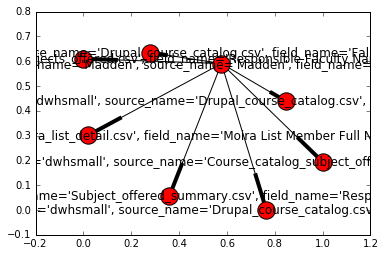

In [28]:
res.visualize_provenance(labels=True)

### Data about the network

In [29]:
reporting.num_columns

1985

In [30]:
reporting.num_tables

166

In [31]:
reporting.num_content_sim_relations

2106.0

In [32]:
reporting.num_schema_sim_relations

4522.0

In [33]:
reporting.num_pkfk_relations

232.0